<a href="https://colab.research.google.com/github/MarouenKadri/Algorithmic-Thinking/blob/main/UnetModelV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))




Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()

In [3]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 30 13:44:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    26W /  70W |    339MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
class DataManager :  
   def __init__(self) :
        self.train_dir1 ="/content/drive/MyDrive/Colab Notebooks/WrinkleDetection_Unet/after processing/imgmasked/train"
        self.train_dir2 ="/content/drive/MyDrive/Colab Notebooks/WrinkleDetection_Unet/after processing/texture/train"
        self.test_dir= "/content/drive/MyDrive/Colab Notebooks/WrinkleDetection_Unet/after processing/grd/train"
        self.test_dir1 ="/content/drive/MyDrive/Colab Notebooks/WrinkleDetection_Unet/after processing/imgmasked/test"
        self.test_dir2 ="/content/drive/MyDrive/Colab Notebooks/WrinkleDetection_Unet/after processing/texture/test"
        self.load_data()   
   def load_data(self):  
        X_train1=[]
        X_train2=[]
        Y_train=[]
#load Image as rgb 
        image_files1 = [f for f in os.listdir(self.train_dir1) if f.endswith('.jpg') or f.endswith('.png')]
        sorted_files1 = sorted(image_files1)
        for filename in sorted_files1:
              img=cv2.imread(os.path.join(self.train_dir1,filename))
              X_train1.append(img/255.0)
        X_train1=np.array(X_train1)  
#load image as grayscale
        image_files2 = [f for f in os.listdir(self.train_dir2) if f.endswith('.jpg') or f.endswith('.png')]
        sorted_files2 = sorted(image_files2)
        for filename in sorted_files2:
              img=cv2.imread(os.path.join(self.train_dir2,filename),cv2.IMREAD_GRAYSCALE)
              X_train2.append(img/255.0)
        X_train2=np.array(X_train2)
#load image as grayscale
        image_files3 = [f for f in os.listdir(self.test_dir) if f.endswith('.jpg') or f.endswith('.png')]
        sorted_files3 = sorted(image_files3)
        for filename in sorted_files3:
              img=cv2.imread(os.path.join(self.test_dir,filename),cv2.IMREAD_GRAYSCALE)
              Y_train.append(img/255.0)
        Y_train=np.array(Y_train)  
        return X_train1,X_train2,Y_train  
   def load_testData(self): 
        Y_test1=[]
        Y_test2=[]
        image_files1 = [f for f in os.listdir(self.test_dir1) if f.endswith('.jpg') or f.endswith('.png')]
        sorted_files1 = sorted(image_files1)
        for filename in sorted_files1:
              img=cv2.imread(os.path.join(self.test_dir1,filename))
              Y_test1.append(img/255.0)
        Y_test1=np.array(Y_test1)
        image_files2 = [f for f in os.listdir(self.test_dir2) if f.endswith('.jpg') or f.endswith('.png')]
        sorted_files2 = sorted(image_files2)
        for filename in sorted_files2:
             img=cv2.imread(os.path.join(self.test_dir2,filename),cv2.IMREAD_GRAYSCALE)
             Y_test2.append(img/255.0)
        Y_test2=np.array(Y_test2)

        return Y_test1 ,Y_test2
 

     






Epoch 1/40
58/58 [==============================] - ETA: 0s - loss: 0.6370 - dice_coefficient: 0.3630
Epoch 1: val_loss improved from inf to 0.95039, saving model to best_w.h5
58/58 [==============================] - 106s 2s/step - loss: 0.6370 - dice_coefficient: 0.3630 - val_loss: 0.9504 - val_dice_coefficient: 0.0483 - lr: 0.0010
Epoch 2/40
58/58 [==============================] - ETA: 0s - loss: 0.4304 - dice_coefficient: 0.5696
Epoch 2: val_loss did not improve from 0.95039
58/58 [==============================] - 96s 2s/step - loss: 0.4304 - dice_coefficient: 0.5696 - val_loss: 0.9638 - val_dice_coefficient: 0.0354 - lr: 9.9861e-04
Epoch 3/40
58/58 [==============================] - ETA: 0s - loss: 0.3906 - dice_coefficient: 0.6094
Epoch 3: val_loss did not improve from 0.95039
58/58 [==============================] - 96s 2s/step - loss: 0.3906 - dice_coefficient: 0.6094 - val_loss: 0.9675 - val_dice_coefficient: 0.0317 - lr: 9.9446e-04
Epoch 4/40
58/58 [=========================

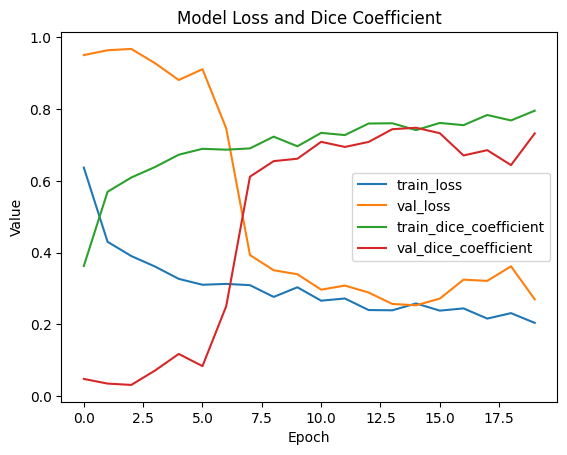

done !


In [4]:
import os
import cv2
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, \
    Dropout, Lambda,LeakyReLU ,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import keras.backend as K
import tensorflow as tf
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
import math
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split  
import matplotlib.pyplot as plt



device_name = tf.test.gpu_device_name()


################################################################
# Load Data
################################################################
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(image_dataset, mask_dataset, test_size = 0.20, random_state = 0)

manager=DataManager()
X_train1 ,X_train2,Y_train=manager.load_data()

val_split = 0.2

# Split the data into training and validation sets
X_train1, X_val1, X_train2, X_val2, Y_train, Y_val = train_test_split(
    X_train1, X_train2, Y_train, test_size=val_split, random_state=42)

# Define the image data generator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    #brightness_range=[0.1, 0.5],
    horizontal_flip=True,
    vertical_flip=True,
)

# Fit the image data generator on the training data
datagen.fit(X_train1)


checkpoint = ModelCheckpoint(
    filepath='best_w.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
lr_max = 0.001
lr_min = 0.0001
epochs = 40
def cosine_annealing(epoch):
    cos_inner = (math.pi * epoch) / epochs
    return lr_min + 0.5 * (lr_max - lr_min) * (1 + math.cos(cos_inner))

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(K.cast(y_true, 'float32'))
    y_pred_f = K.flatten(K.cast(y_pred, 'float32'))
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coefficient(y_true, y_pred)



def DoubleConv(input_tensor, n_filters, kernel_size=3):
        X = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), padding='same',
                   kernel_initializer='he_normal')(input_tensor)
        X = BatchNormalization()(X)
        X = LeakyReLU(alpha=0.1)(X)
        x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), padding='same',
                   kernel_initializer='he_normal')(X)
        X = BatchNormalization()(X)
        X = LeakyReLU(alpha=0.1)(X)
        return X

def Unet_model() :
    IMG_WIDTH = 640
    IMG_HEIGHT = 640
    IMG_CHANNELS1 = 3
    IMG_CHANNELS2 = 1
    input1 = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS1))
    input2 = Input(shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS2))
    input1 = Lambda(lambda x: x / 255)(input1)
    input2= Lambda(lambda x: x / 255)(input2)

    input_tensor = concatenate([input1, input2])
    #########################################################################################################################################
    c1=DoubleConv(input_tensor, 64, kernel_size=3)
    p1 = MaxPooling2D((2, 2))(c1)  
    p1 = Dropout(0.1)(p1)
    ############################################################################################################################################
    c2=DoubleConv(p1, 128, kernel_size=3)
    p2 = MaxPooling2D((2, 2))(c2)
    #############################################################################################################################################
    c3 = DoubleConv(p2, 256, kernel_size=3)
    p3=MaxPooling2D ((2,2))(c3)
    p3 = Dropout(0.1)(p3)
    ###############################################################################################################################################
    c4 = DoubleConv(p3, 512, kernel_size=3)
    p4 = MaxPooling2D((2, 2))(c4)
    #################################################################################################################################################
    c5 = DoubleConv(p4, 512, kernel_size=3)  
    c5 = Dropout(0.1)(c5)
    ################################################################################################################################################
    # Expansive path
    concate1 = Conv2DTranspose(1024, (2, 2), strides=(2, 2), padding='same')(c5)
    concate1 = concatenate([concate1, c4])
    u1 = DoubleConv(concate1, 256, kernel_size=3)
    #################################################################################################################################################
    # 2nd Upsampling & concatenate
    concate2 = Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(u1)
    concate2= concatenate([concate2,c3])
    # 3rd Conv2D layer
    u2 = DoubleConv(concate2, 128, kernel_size=3)
    u2 = Dropout(0.1)(u2)
    ################################################################################################################################################
    # 4th Upsampling & concatenate
    concate3 = Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(u2)
    concate3 = concatenate([concate3, c2])
    u3 = DoubleConv(concate3, 64, kernel_size=3)
    u3 = Dropout(0.1)(u3)
    ##################################################################################################################################################
    # 5th Upsampling & concatenate
    concate4 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(u3)
    concate4 = concatenate([concate4, c1])
    u4 = DoubleConv(concate4, 64, kernel_size=3)
    ##################################################################################################################################################
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(u4)

    model = Model(inputs=[input1,input2], outputs=[outputs])

    return model

if __name__ == "__main__":
    model=Unet_model()
    lr_scheduler = LearningRateScheduler(cosine_annealing)
    model.compile(optimizer='adam', loss=dice_loss, metrics=[dice_coefficient])
    #model.summary()
    #model.fit(datagen.flow([X_train1, X_train2], Y_train),validation_data=([X_val1, X_val2], Y_val), epochs=20,callbacks=[lr_scheduler,checkpoint,early_stopping  ], batch_size=4)
    history=model.fit(datagen.flow([X_train1, X_train2], Y_train),validation_data=([X_val1, X_val2], Y_val), epochs=20,callbacks=[lr_scheduler,checkpoint,early_stopping  ], batch_size=4)
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
# Plot the history of dice coefficient
    plt.plot(history.history['dice_coefficient'], label='train_dice_coefficient')
    plt.plot(history.history['val_dice_coefficient'], label='val_dice_coefficient')
    plt.title('Model Dice Coefficient')
    plt.xlabel('Epoch')
    plt.ylabel('Dice Coefficient')
    plt.legend()
    plt.show()
    model.save('modell.h5')
    print('done !')

In [18]:
import os  
import tensorflow as tf


import cv2
import keras.models
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, \
    Dropout, Lambda,LeakyReLU ,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import matplotlib.pyplot as plt


import keras

import numpy as np
import keras.backend as K  
import timeit

device_name = tf.test.gpu_device_name()

manage=DataManager()



def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(K.cast(y_true, 'float32'))
    y_pred_f = K.flatten(K.cast(y_pred, 'float32'))
    intersection = K.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (K.sum(y_true_f*y_true_f) + K.sum(y_pred_f*y_pred_f) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coefficient(y_true, y_pred)

Y_test1,Y_test2 =manage.load_testData()

#import the model
#model = keras.models.load_model('/content/best_w.h5')
model = keras.models.load_model('/content/best_w.h5',custom_objects={'dice_loss': dice_loss, 'dice_coefficient': dice_coefficient} )
predicted_masks = model.predict([Y_test1,Y_test2],batch_size=4)

threshold = 0.5
predicted_masks = (predicted_masks > threshold).astype('uint8')  

#print(predicted_masks.shape)
#for i in range(predicted_masks.shape[0]):
         #print(predicted_masks[i]*255)  

         #cv2.imwrite('ll{}.png'.format(i), predicted_masks[i]*255)

plt.plot(model.history['loss'], label='train_loss')
plt.plot(model.history['val_loss'], label='val_loss')
plt.plot(model.history['dice_coefficient'], label='train_dice_coefficient')
plt.plot(model.history['val_dice_coefficient'], label='val_dice_coefficient')
plt.title('Model Loss and Dice Coefficient')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.show()         

print('Done !')



13/13 [==============================] - 4s 339ms/step


TypeError: ignored